<a href="https://colab.research.google.com/github/redfyel/predicting-impact-of-geopolitical-events-on-cyber-threats/blob/main/predicting_impact_of_geopolitical_events_on_cyber_threats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report

# Import the dataset

## Connect to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset_build/geopol_and_cyber_threats_corrupted.csv')

In [4]:
dataset

,Event_Date,Event_Type,Event_Region,Event_Intensity,Event_Duration_Days,Event_Polarity,Event_Media_Coverage,Cyber_Threat_Type,Cyber_Threat_Severity,Num_Cyber_Attacks,...,Media_Sentiment_Score,Pre_Event_Threat_Count,Post_Event_Threat_Count,Cybercrime_Index,Cybersecurity_Exposure_Index,Threat_Lag,Post_Event_Duration,Likelihood,Severity,Country_Risk_Category
0,2025-02-28,Protests,North America,7.000000,3.770512,Neutral,77.999729,Ransomawre,2.0,49.0,...,-0.861185,NaN,109.0,65.088847,5.641158,7.0,11.0,0.007000,2.0,Medium
1,2025-02-24,Sancitons,Africa,9.000000,5.353984,Positive,NaN,Insider Threat,2.0,41.0,...,0.570352,51.0,92.0,59.241457,4.645041,2.0,11.0,-0.047741,2.0,Medium
2,2025-03-15,Military Conflict,North America,4.000000,5.285377,oPsitive,38.541650,DDoS,1.0,44.0,...,0.666390,63.0,107.0,17.336465,39.106061,8.0,9.0,0.568000,1.0,High
3,2025-03-14,Trade Disputes,South America,2.000000,2.886640,Positive,77.513282,Insider Threat,3.0,60.0,...,-0.608034,47.0,107.0,38.867729,27.134903,6.0,NaN,0.281000,3.0,High
4,2025-02-22,Military Conflict,Europe,9.000000,2.469740,Negative,NaN,Insider Threat,2.0,NaN,...,-0.071133,39.0,NaN,79.017554,60.595997,7.0,9.0,0.371000,2.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,2025-02-19,Trade Disputes,North America,10.000000,6.066663,Positive,47.507898,Ransomware,2.0,47.0,...,-0.937277,58.0,105.0,41.987037,50.816379,3.0,13.0,0.634000,2.0,Medium
1016,2025-02-26,Elections,Africa,42.023145,-0.657346,Positive,25.648752,Phishing,2.0,53.0,...,0.755610,37.0,90.0,76.488616,2.215663,1.0,11.0,0.863000,2.0,Low
1017,2025-03-06,Sanctions,North America,10.000000,2.363296,Negative,24.985380,Data Breach,2.0,NaN,...,-0.978655,63.0,115.0,77.655747,82.164933,7.0,9.0,0.513309,2.0,High
1018,NaN,Protests,North America,1.000000,1.790006,Neutral,86.678689,Phishing,2.0,47.0,...,0.420546,41.0,88.0,67.791095,35.336946,5.0,10.0,0.341000,2.0,Low


# View the dataset


In [5]:
# Generate basic info
print("Dataset Info:")
dataset.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Event_Date                    967 non-null    object 
 1   Event_Type                    970 non-null    object 
 2   Event_Region                  970 non-null    object 
 3   Event_Intensity               969 non-null    float64
 4   Event_Duration_Days           969 non-null    float64
 5   Event_Polarity                970 non-null    object 
 6   Event_Media_Coverage          970 non-null    float64
 7   Cyber_Threat_Type             970 non-null    object 
 8   Cyber_Threat_Severity         969 non-null    float64
 9   Num_Cyber_Attacks             968 non-null    float64
 10  Threat_Actors                 969 non-null    object 
 11  Target_Sector                 967 non-null    object 
 12  Geopolitical_Risk_Index       969 non-null    fl

## Check for missing values

In [6]:
# Check missing values
print("Missing Values:")
print(dataset.isnull().sum())

Missing Values:
Event_Date                      53
Event_Type                      50
Event_Region                    50
Event_Intensity                 51
Event_Duration_Days             51
Event_Polarity                  50
Event_Media_Coverage            50
Cyber_Threat_Type               50
Cyber_Threat_Severity           51
Num_Cyber_Attacks               52
Threat_Actors                   51
Target_Sector                   53
Geopolitical_Risk_Index         51
Economic_Impact_Score           52
Media_Sentiment_Score           50
Pre_Event_Threat_Count          52
Post_Event_Threat_Count         51
Cybercrime_Index                51
Cybersecurity_Exposure_Index    51
Threat_Lag                      50
Post_Event_Duration             51
Likelihood                      50
Severity                        50
Country_Risk_Category           50
dtype: int64


## Check for duplicates

In [7]:
# Check duplicates
print("Duplicate Rows:", dataset.duplicated().sum())

Duplicate Rows: 20


## Statistics

In [8]:
# Basic statistics
print("Summary Statistics:")
print(dataset.describe())

Summary Statistics:
       Event_Intensity  Event_Duration_Days  Event_Media_Coverage  \
count       969.000000           969.000000            970.000000   
mean          8.469077             4.924531             49.846679   
std          14.252574             3.139393             28.559175   
min           0.530317            -5.339471              0.135552   
25%           3.000000             2.784966             24.985380   
50%           6.000000             5.021849             50.318468   
75%           9.000000             7.092870             73.068429   
max         100.000000            13.402631             99.950519   

       Cyber_Threat_Severity  Num_Cyber_Attacks  Geopolitical_Risk_Index  \
count             969.000000         968.000000               969.000000   
mean                1.897833          47.429029                46.991381   
std                 0.706292          12.028502                29.445864   
min                 1.000000           3.400000       

## Check for outliers

In [9]:
# Check for outliers using IQR
numeric_cols = dataset.select_dtypes(include=[np.number])
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).sum()
print("Outlier Count Per Column:")
print(outliers)

Outlier Count Per Column:
Event_Intensity                 46
Event_Duration_Days              3
Event_Media_Coverage             0
Cyber_Threat_Severity            0
Num_Cyber_Attacks               55
Geopolitical_Risk_Index          0
Economic_Impact_Score            0
Media_Sentiment_Score            0
Pre_Event_Threat_Count           8
Post_Event_Threat_Count         12
Cybercrime_Index                 0
Cybersecurity_Exposure_Index     0
Threat_Lag                       1
Post_Event_Duration              6
Likelihood                       0
Severity                         0
dtype: int64


## Check unique values for categorical columns

In [10]:
# Check unique values for categorical columns
print("Unique Values in Categorical Columns:")
categorical_cols = dataset.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {dataset[col].nunique()} unique values")

Unique Values in Categorical Columns:
Event_Date: 36 unique values
Event_Type: 46 unique values
Event_Region: 44 unique values
Event_Polarity: 23 unique values
Cyber_Threat_Type: 40 unique values
Threat_Actors: 41 unique values
Target_Sector: 39 unique values
Country_Risk_Category: 3 unique values


# Data Cleaning

## Handle missing values

In [11]:
# Handle missing values
for col in dataset.select_dtypes(include=['float64', 'int64']).columns:
    dataset[col] = dataset[col].fillna(dataset[col].median())  # Fill numeric with median
for col in dataset.select_dtypes(include=['object']).columns:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])  # Fill categorical with mode


## Handle duplicate records

In [12]:
# Remove duplicate rows
dataset.drop_duplicates(inplace=True)

## Handle outliers in numeric columns

In [13]:
# Handle outliers using IQR only for numeric columns
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
Q1 = dataset[numeric_cols].quantile(0.25)
Q3 = dataset[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset[numeric_cols] < (Q1 - 1.5 * IQR)) | (dataset[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

## Handle typos in categorical values

In [14]:
# Standardize categorical values (strip spaces, lowercase, fix typos)
fix_mappings = {
    "techonlogy": "technology",
    "tecnhology": "technology",
    "tehcnology": "technology",
    "ehealthcare": "healthcare",
    "etchnology": "technology",
    "ifnance": "finance",
    "nenergy": "energy",
    "ogvernment": "government"
}

categorical_cols = dataset.select_dtypes(include=['object']).columns
dataset[categorical_cols] = dataset[categorical_cols].apply(lambda x: x.str.strip().str.lower())
dataset.replace(fix_mappings, inplace=True)  # Fix known typos

<ipython-input-14-dac25252adc1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[categorical_cols] = dataset[categorical_cols].apply(lambda x: x.str.strip().str.lower())
<ipython-input-14-dac25252adc1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.replace(fix_mappings, inplace=True)  # Fix known typos


## Check for inconsistencies after cleaning


In [15]:
# Check for inconsistencies after cleaning
for col in categorical_cols:
    print(f"Unique values in {col}: {dataset[col].unique()}")

Unique values in Event_Date: ['2025-02-28' '2025-02-24' '2025-03-15' '2025-03-14' '2025-02-22'
 '2025-03-04' '2025-03-13' '2025-03-17' '2025-03-09' '2025-03-16'
 '2025-03-02' '2025-03-06' '2025-02-26' '2025-02-17' '2025-03-22'
 '2025-03-03' '2025-02-23' '2025-03-12' '2025-03-08' '2025-02-27'
 '2025-02-25' '2025-03-10' '2025-03-05' '2025-03-11' '2025-03-21'
 '2025-03-18' '2025-03-07' '2025-03-01' '2025-02-21' '2025-02-19'
 '2025-03-19' '2025-03-20' '2025-02-16' '2025-02-18' '2025-02-20'
 '2025-02-15']
Unique values in Event_Type: ['protests' 'sancitons' 'military conflict' 'trade disputes' 'sanctions'
 'elections' 'tarde disputes' 'prtoests' 'portests' 'militray conflict'
 'asnctions' 'electoins' 'sanctiosn' 'protetss' 'traed disputes'
 'trade idsputes' 'eelctions' 'leections' 'electinos' 'proetsts'
 'military conflitc' 'trade dsiputes' 'eletcions' 'trade disptues'
 'rpotests' 'military cnoflict' 'electiosn' 'santcions' 'protesst'
 'sacntions' 'sanctinos' 'military conlfict' 'sanctoins'

## Checking if cleaned well

In [16]:
# Generate basic info
print("Dataset Info:")
dataset.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Event_Date                    842 non-null    object 
 1   Event_Type                    842 non-null    object 
 2   Event_Region                  842 non-null    object 
 3   Event_Intensity               842 non-null    float64
 4   Event_Duration_Days           842 non-null    float64
 5   Event_Polarity                842 non-null    object 
 6   Event_Media_Coverage          842 non-null    float64
 7   Cyber_Threat_Type             842 non-null    object 
 8   Cyber_Threat_Severity         842 non-null    float64
 9   Num_Cyber_Attacks             842 non-null    float64
 10  Threat_Actors                 842 non-null    object 
 11  Target_Sector                 842 non-null    object 
 12  Geopolitical_Risk_Index       842 non-null    float64
 

### Check if missing values are handled

In [17]:
# Check missing values
print("Missing Values:")
print(dataset.isnull().sum())

Missing Values:
Event_Date                      0
Event_Type                      0
Event_Region                    0
Event_Intensity                 0
Event_Duration_Days             0
Event_Polarity                  0
Event_Media_Coverage            0
Cyber_Threat_Type               0
Cyber_Threat_Severity           0
Num_Cyber_Attacks               0
Threat_Actors                   0
Target_Sector                   0
Geopolitical_Risk_Index         0
Economic_Impact_Score           0
Media_Sentiment_Score           0
Pre_Event_Threat_Count          0
Post_Event_Threat_Count         0
Cybercrime_Index                0
Cybersecurity_Exposure_Index    0
Threat_Lag                      0
Post_Event_Duration             0
Likelihood                      0
Severity                        0
Country_Risk_Category           0
dtype: int64


### Check if duplicate records are handled

In [18]:
# Check duplicates
print("Duplicate Rows:", dataset.duplicated().sum())

Duplicate Rows: 0


In [19]:
# Basic statistics
print("Summary Statistics:")
print(dataset.describe())

Summary Statistics:
       Event_Intensity  Event_Duration_Days  Event_Media_Coverage  \
count       842.000000           842.000000            842.000000   
mean          5.669367             4.999623             50.230753   
std           2.817011             2.989290             27.831729   
min           0.530317            -3.189817              0.135552   
25%           3.000000             2.925805             26.654259   
50%           6.000000             5.021849             50.318468   
75%           8.000000             6.905723             72.659018   
max          10.313066            13.090696             99.950519   

       Cyber_Threat_Severity  Num_Cyber_Attacks  Geopolitical_Risk_Index  \
count             842.000000         842.000000               842.000000   
mean                1.903800          49.618765                46.747989   
std                 0.690696           6.674763                29.043190   
min                 1.000000          29.000000       

In [20]:
# Check final column names
print("Final Columns:", dataset.columns.tolist())

Final Columns: ['Event_Date', 'Event_Type', 'Event_Region', 'Event_Intensity', 'Event_Duration_Days', 'Event_Polarity', 'Event_Media_Coverage', 'Cyber_Threat_Type', 'Cyber_Threat_Severity', 'Num_Cyber_Attacks', 'Threat_Actors', 'Target_Sector', 'Geopolitical_Risk_Index', 'Economic_Impact_Score', 'Media_Sentiment_Score', 'Pre_Event_Threat_Count', 'Post_Event_Threat_Count', 'Cybercrime_Index', 'Cybersecurity_Exposure_Index', 'Threat_Lag', 'Post_Event_Duration', 'Likelihood', 'Severity', 'Country_Risk_Category']


In [21]:
dataset.dtypes

,0
Event_Date,object
Event_Type,object
Event_Region,object
Event_Intensity,float64
Event_Duration_Days,float64
Event_Polarity,object
Event_Media_Coverage,float64
Cyber_Threat_Type,object
Cyber_Threat_Severity,float64
Num_Cyber_Attacks,float64


In [22]:
# Handle outliers using IQR for numeric columns
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
Q1 = dataset[numeric_cols].quantile(0.25)
Q3 = dataset[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset[numeric_cols] < (Q1 - 1.5 * IQR)) | (dataset[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Recalculate quantiles on the filtered dataset
Q1_new = dataset[numeric_cols].quantile(0.25)
Q3_new = dataset[numeric_cols].quantile(0.75)
IQR_new = Q3_new - Q1_new

# Calculate outliers after filtering
outliers = ((dataset[numeric_cols] < (Q1_new - 1.5 * IQR_new)) |
            (dataset[numeric_cols] > (Q3_new + 1.5 * IQR_new))).sum()

print("Outlier Count Per Column (after filtering):")
print(outliers)


Outlier Count Per Column (after filtering):
Event_Intensity                 0
Event_Duration_Days             0
Event_Media_Coverage            0
Cyber_Threat_Severity           0
Num_Cyber_Attacks               0
Geopolitical_Risk_Index         0
Economic_Impact_Score           0
Media_Sentiment_Score           0
Pre_Event_Threat_Count          0
Post_Event_Threat_Count         0
Cybercrime_Index                0
Cybersecurity_Exposure_Index    0
Threat_Lag                      0
Post_Event_Duration             0
Likelihood                      0
Severity                        0
dtype: int64


## Typos Cleaning

In [23]:
# Standardize categorical values (strip spaces, lowercase)
dataset = dataset.apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)

# Fix known typos and inconsistencies in categorical values
fix_mappings = {
    # Event_Type
    "sancitons": "sanctions", "tarde disputes": "trade disputes",
    "prtoests": "protests", "portests": "protests", "militray conflict": "military conflict",
    "asnctions": "sanctions", "electoins": "elections", "sanctiosn": "sanctions",
    "protetss": "protests", "traed disputes": "trade disputes", "trade idsputes": "trade disputes",
    "eelctions": "elections", "leections": "elections", "electinos": "elections",
    "proetsts": "protests", "military conflitc": "military conflict", "trade dsiputes": "trade disputes",
    "eletcions": "elections", "trade disptues": "trade disputes", "rpotests": "protests",
    "military cnoflict": "military conflict", "electiosn": "elections", "santcions": "sanctions",
    "protesst": "protests", "sacntions": "sanctions", "sanctinos": "sanctions",
    "military conlfict": "military conflict", "sanctoins": "sanctions",
    "military confilct": "military conflict", "traded isputes": "trade disputes",
    "mliitary conflict": "military conflict", "trad edisputes": "trade disputes",
    "trdae disputes": "trade disputes", "miiltary conflict": "military conflict",
    "snactions": "sanctions", "protsets": "protests", "militayr conflict": "military conflict",

    # Event_Region
    "nroth america": "north america", "middle esat": "middle east", "aisa": "asia",
    "asai": "asia", "notrh america": "north america", "north ameriac": "north america",
    "saia": "asia", "souht america": "south america", "euorpe": "europe", "afirca": "africa",
    "nort hamerica": "north america", "farica": "africa", "afrcia": "africa",
    "north aemrica": "north america", "sout hamerica": "south america",
    "mdidle east": "middle east", "south amercia": "south america",
    "suoth america": "south america", "eruope": "europe", "uerope": "europe",
    "arfica": "africa", "north maerica": "north america", "north amreica": "north america",
    "afriac": "africa", "midlde east": "middle east", "south ameirca": "south america",
    "north amercia": "north america", "southa merica": "south america",
    "south aemrica": "south america", "south amreica": "south america",
    "middl eeast": "middle east", "sotuh america": "south america",
    "south ameriac": "south america", "onrth america": "north america",
    "osuth america": "south america",

    # Event_Polarity
    "opsitive": "positive", "neagtive": "negative", "positiev": "positive",
    "negatvie": "negative", "engative": "negative", "negaitve": "negative",
    "posiitve": "positive", "enutral": "neutral", "psoitive": "positive",
    "postiive": "positive", "poistive": "positive", "netural": "neutral",
    "nuetral": "neutral", "neutrla": "neutral", "neutarl": "neutral",
    "ngeative": "negative", "negtaive": "negative", "neurtal": "neutral",
    "positvie": "positive", "negatiev": "negative",

    # Cyber_Threat_Type
    "ransomawre": "ransomware", "insdier threat": "insider threat",
    "daat breach": "data breach", "ransowmare": "ransomware", "data berach": "data breach",
    "insider trheat": "insider threat", "datab reach": "data breach",
    "ransmoware": "ransomware", "phihsing": "phishing", "phisihng": "phishing",
    "insider threta": "insider threat", "ranosmware": "ransomware",
    "hpishing": "phishing", "ddso": "ddos", "dtaa breach": "data breach",
    "pihshing": "phishing", "dods": "ddos", "insiedr threat": "insider threat",
    "ransomwaer": "ransomware", "data braech": "data breach", "rasnomware": "ransomware",

    # Threat_Actors
    "hacktivisst": "hacktivists", "state-sopnsored": "state-sponsored",
    "state-sponsroed": "state-sponsored", "state-sponosred": "state-sponsored",
    "hactkivists": "hacktivists", "hakctivists": "hacktivists",
    "inisders": "insiders", "ahcktivists": "hacktivists", "cybercrimianls": "cybercriminals",

    # Target_Sector
    "eenrgy": "energy", "enegry": "energy", "governemnt": "government",
    "healtchare": "healthcare", "haelthcare": "healthcare", "neergy": "energy",
    "healthacre": "healthcare", "healthcrae": "healthcare",
}

dataset.replace(fix_mappings, inplace=True)

In [24]:
# Generate basic info
print("Dataset Info:")
dataset.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 825 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Event_Date                    825 non-null    object 
 1   Event_Type                    825 non-null    object 
 2   Event_Region                  825 non-null    object 
 3   Event_Intensity               825 non-null    float64
 4   Event_Duration_Days           825 non-null    float64
 5   Event_Polarity                825 non-null    object 
 6   Event_Media_Coverage          825 non-null    float64
 7   Cyber_Threat_Type             825 non-null    object 
 8   Cyber_Threat_Severity         825 non-null    float64
 9   Num_Cyber_Attacks             825 non-null    float64
 10  Threat_Actors                 825 non-null    object 
 11  Target_Sector                 825 non-null    object 
 12  Geopolitical_Risk_Index       825 non-null    float64
 

In [25]:
# Check final column names
print("Final Columns:", dataset.columns.tolist())

Final Columns: ['Event_Date', 'Event_Type', 'Event_Region', 'Event_Intensity', 'Event_Duration_Days', 'Event_Polarity', 'Event_Media_Coverage', 'Cyber_Threat_Type', 'Cyber_Threat_Severity', 'Num_Cyber_Attacks', 'Threat_Actors', 'Target_Sector', 'Geopolitical_Risk_Index', 'Economic_Impact_Score', 'Media_Sentiment_Score', 'Pre_Event_Threat_Count', 'Post_Event_Threat_Count', 'Cybercrime_Index', 'Cybersecurity_Exposure_Index', 'Threat_Lag', 'Post_Event_Duration', 'Likelihood', 'Severity', 'Country_Risk_Category']


In [26]:
# Check for inconsistencies after cleaning
for col in categorical_cols:
    print(f"Unique values in {col}: {dataset[col].unique()}")

Unique values in Event_Date: ['2025-02-28' '2025-02-24' '2025-03-15' '2025-03-14' '2025-02-22'
 '2025-03-04' '2025-03-13' '2025-03-17' '2025-03-09' '2025-03-16'
 '2025-03-02' '2025-03-06' '2025-02-26' '2025-02-17' '2025-03-22'
 '2025-03-03' '2025-02-23' '2025-03-12' '2025-03-08' '2025-02-27'
 '2025-02-25' '2025-03-10' '2025-03-05' '2025-03-11' '2025-03-21'
 '2025-03-18' '2025-03-07' '2025-03-01' '2025-02-21' '2025-02-19'
 '2025-03-19' '2025-03-20' '2025-02-16' '2025-02-18' '2025-02-20'
 '2025-02-15']
Unique values in Event_Type: ['protests' 'sanctions' 'military conflict' 'trade disputes' 'elections']
Unique values in Event_Region: ['north america' 'africa' 'south america' 'europe' 'asia' 'middle east']
Unique values in Event_Polarity: ['neutral' 'positive' 'negative']
Unique values in Cyber_Threat_Type: ['ransomware' 'insider threat' 'ddos' 'data breach' 'phishing'
 'rnasomware' 'isnider threat' 'adta breach' 'insider therat' 'phishign'
 'phsihing' 'dat abreach' 'data brecah' 'insider

## Using thefuzz to clean up categorical values

In [27]:
pip install thefuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.2 MB/s eta 0:00:00


In [28]:
from thefuzz import process

# Define correct category names
correct_cyber_threats = ['ransomware', 'insider threat', 'ddos', 'data breach', 'phishing']
correct_threat_actors = ['hacktivists', 'state-sponsored', 'cybercriminals', 'insiders']
correct_target_sectors = ['energy', 'technology', 'finance', 'healthcare', 'government']

# Function to correct spelling
def correct_spelling(value, choices):
    return process.extractOne(value, choices)[0]  # Finds the closest match

# Apply to dataset
dataset['Cyber_Threat_Type'] = dataset['Cyber_Threat_Type'].apply(lambda x: correct_spelling(x, correct_cyber_threats))
dataset['Threat_Actors'] = dataset['Threat_Actors'].apply(lambda x: correct_spelling(x, correct_threat_actors))
dataset['Target_Sector'] = dataset['Target_Sector'].apply(lambda x: correct_spelling(x, correct_target_sectors))

In [29]:
print(dataset['Cyber_Threat_Type'].unique())
print(dataset['Threat_Actors'].unique())
print(dataset['Target_Sector'].unique())

['ransomware' 'insider threat' 'ddos' 'data breach' 'phishing']
['hacktivists' 'state-sponsored' 'cybercriminals' 'insiders']
['energy' 'technology' 'finance' 'healthcare' 'government']


In [30]:
dataset

,Event_Date,Event_Type,Event_Region,Event_Intensity,Event_Duration_Days,Event_Polarity,Event_Media_Coverage,Cyber_Threat_Type,Cyber_Threat_Severity,Num_Cyber_Attacks,...,Media_Sentiment_Score,Pre_Event_Threat_Count,Post_Event_Threat_Count,Cybercrime_Index,Cybersecurity_Exposure_Index,Threat_Lag,Post_Event_Duration,Likelihood,Severity,Country_Risk_Category
0,2025-02-28,protests,north america,7.000000,3.770512,neutral,77.999729,ransomware,2.0,49.0,...,-0.861185,49.0,109.0,65.088847,5.641158,7.0,11.0,0.007000,2.0,medium
1,2025-02-24,sanctions,africa,9.000000,5.353984,positive,50.318468,insider threat,2.0,41.0,...,0.570352,51.0,92.0,59.241457,4.645041,2.0,11.0,-0.047741,2.0,medium
2,2025-03-15,military conflict,north america,4.000000,5.285377,positive,38.541650,ddos,1.0,44.0,...,0.666390,63.0,107.0,17.336465,39.106061,8.0,9.0,0.568000,1.0,high
3,2025-03-14,trade disputes,south america,2.000000,2.886640,positive,77.513282,insider threat,3.0,60.0,...,-0.608034,47.0,107.0,38.867729,27.134903,6.0,10.0,0.281000,3.0,high
4,2025-02-22,military conflict,europe,9.000000,2.469740,negative,50.318468,insider threat,2.0,49.0,...,-0.071133,39.0,98.0,79.017554,60.595997,7.0,9.0,0.371000,2.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2025-03-05,sanctions,africa,4.000000,5.403854,neutral,46.457457,ddos,1.0,50.0,...,-0.316042,57.0,107.0,15.322173,58.239660,3.0,10.0,0.295000,1.0,medium
995,2025-03-06,trade disputes,north america,5.000000,6.258167,negative,50.318468,phishing,1.0,52.0,...,0.677155,53.0,105.0,16.551974,14.425131,7.0,10.0,0.480000,1.0,low
996,2025-03-15,sanctions,africa,1.000000,4.892655,neutral,65.809256,ransomware,2.0,54.0,...,-0.178196,23.0,77.0,2.308962,66.907979,5.0,8.0,0.370000,2.0,medium
997,2025-02-24,protests,north america,5.000000,7.972989,negative,50.318468,ransomware,2.0,40.0,...,-1.123876,58.0,98.0,81.341541,34.588591,3.0,11.0,0.441186,2.0,high


In [31]:
dataset.shape

(825, 24)

In [32]:
# Identify categorical columns
categorical_cols = dataset.select_dtypes(include=['object']).columns

# Print unique values for each categorical column
for col in categorical_cols:
    print(f"🔹 Unique values in {col}: {dataset[col].unique()}\n")

🔹 Unique values in Event_Date: ['2025-02-28' '2025-02-24' '2025-03-15' '2025-03-14' '2025-02-22'
 '2025-03-04' '2025-03-13' '2025-03-17' '2025-03-09' '2025-03-16'
 '2025-03-02' '2025-03-06' '2025-02-26' '2025-02-17' '2025-03-22'
 '2025-03-03' '2025-02-23' '2025-03-12' '2025-03-08' '2025-02-27'
 '2025-02-25' '2025-03-10' '2025-03-05' '2025-03-11' '2025-03-21'
 '2025-03-18' '2025-03-07' '2025-03-01' '2025-02-21' '2025-02-19'
 '2025-03-19' '2025-03-20' '2025-02-16' '2025-02-18' '2025-02-20'
 '2025-02-15']

🔹 Unique values in Event_Type: ['protests' 'sanctions' 'military conflict' 'trade disputes' 'elections']

🔹 Unique values in Event_Region: ['north america' 'africa' 'south america' 'europe' 'asia' 'middle east']

🔹 Unique values in Event_Polarity: ['neutral' 'positive' 'negative']

🔹 Unique values in Cyber_Threat_Type: ['ransomware' 'insider threat' 'ddos' 'data breach' 'phishing']

🔹 Unique values in Threat_Actors: ['hacktivists' 'state-sponsored' 'cybercriminals' 'insiders']

🔹 Unique

In [33]:
dataset

,Event_Date,Event_Type,Event_Region,Event_Intensity,Event_Duration_Days,Event_Polarity,Event_Media_Coverage,Cyber_Threat_Type,Cyber_Threat_Severity,Num_Cyber_Attacks,...,Media_Sentiment_Score,Pre_Event_Threat_Count,Post_Event_Threat_Count,Cybercrime_Index,Cybersecurity_Exposure_Index,Threat_Lag,Post_Event_Duration,Likelihood,Severity,Country_Risk_Category
0,2025-02-28,protests,north america,7.000000,3.770512,neutral,77.999729,ransomware,2.0,49.0,...,-0.861185,49.0,109.0,65.088847,5.641158,7.0,11.0,0.007000,2.0,medium
1,2025-02-24,sanctions,africa,9.000000,5.353984,positive,50.318468,insider threat,2.0,41.0,...,0.570352,51.0,92.0,59.241457,4.645041,2.0,11.0,-0.047741,2.0,medium
2,2025-03-15,military conflict,north america,4.000000,5.285377,positive,38.541650,ddos,1.0,44.0,...,0.666390,63.0,107.0,17.336465,39.106061,8.0,9.0,0.568000,1.0,high
3,2025-03-14,trade disputes,south america,2.000000,2.886640,positive,77.513282,insider threat,3.0,60.0,...,-0.608034,47.0,107.0,38.867729,27.134903,6.0,10.0,0.281000,3.0,high
4,2025-02-22,military conflict,europe,9.000000,2.469740,negative,50.318468,insider threat,2.0,49.0,...,-0.071133,39.0,98.0,79.017554,60.595997,7.0,9.0,0.371000,2.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2025-03-05,sanctions,africa,4.000000,5.403854,neutral,46.457457,ddos,1.0,50.0,...,-0.316042,57.0,107.0,15.322173,58.239660,3.0,10.0,0.295000,1.0,medium
995,2025-03-06,trade disputes,north america,5.000000,6.258167,negative,50.318468,phishing,1.0,52.0,...,0.677155,53.0,105.0,16.551974,14.425131,7.0,10.0,0.480000,1.0,low
996,2025-03-15,sanctions,africa,1.000000,4.892655,neutral,65.809256,ransomware,2.0,54.0,...,-0.178196,23.0,77.0,2.308962,66.907979,5.0,8.0,0.370000,2.0,medium
997,2025-02-24,protests,north america,5.000000,7.972989,negative,50.318468,ransomware,2.0,40.0,...,-1.123876,58.0,98.0,81.341541,34.588591,3.0,11.0,0.441186,2.0,high


# Encoding

## Before encoding

In [34]:
dataset

,Event_Date,Event_Type,Event_Region,Event_Intensity,Event_Duration_Days,Event_Polarity,Event_Media_Coverage,Cyber_Threat_Type,Cyber_Threat_Severity,Num_Cyber_Attacks,...,Media_Sentiment_Score,Pre_Event_Threat_Count,Post_Event_Threat_Count,Cybercrime_Index,Cybersecurity_Exposure_Index,Threat_Lag,Post_Event_Duration,Likelihood,Severity,Country_Risk_Category
0,2025-02-28,protests,north america,7.000000,3.770512,neutral,77.999729,ransomware,2.0,49.0,...,-0.861185,49.0,109.0,65.088847,5.641158,7.0,11.0,0.007000,2.0,medium
1,2025-02-24,sanctions,africa,9.000000,5.353984,positive,50.318468,insider threat,2.0,41.0,...,0.570352,51.0,92.0,59.241457,4.645041,2.0,11.0,-0.047741,2.0,medium
2,2025-03-15,military conflict,north america,4.000000,5.285377,positive,38.541650,ddos,1.0,44.0,...,0.666390,63.0,107.0,17.336465,39.106061,8.0,9.0,0.568000,1.0,high
3,2025-03-14,trade disputes,south america,2.000000,2.886640,positive,77.513282,insider threat,3.0,60.0,...,-0.608034,47.0,107.0,38.867729,27.134903,6.0,10.0,0.281000,3.0,high
4,2025-02-22,military conflict,europe,9.000000,2.469740,negative,50.318468,insider threat,2.0,49.0,...,-0.071133,39.0,98.0,79.017554,60.595997,7.0,9.0,0.371000,2.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2025-03-05,sanctions,africa,4.000000,5.403854,neutral,46.457457,ddos,1.0,50.0,...,-0.316042,57.0,107.0,15.322173,58.239660,3.0,10.0,0.295000,1.0,medium
995,2025-03-06,trade disputes,north america,5.000000,6.258167,negative,50.318468,phishing,1.0,52.0,...,0.677155,53.0,105.0,16.551974,14.425131,7.0,10.0,0.480000,1.0,low
996,2025-03-15,sanctions,africa,1.000000,4.892655,neutral,65.809256,ransomware,2.0,54.0,...,-0.178196,23.0,77.0,2.308962,66.907979,5.0,8.0,0.370000,2.0,medium
997,2025-02-24,protests,north america,5.000000,7.972989,negative,50.318468,ransomware,2.0,40.0,...,-1.123876,58.0,98.0,81.341541,34.588591,3.0,11.0,0.441186,2.0,high


In [35]:
print(dataset.columns.tolist())


['Event_Date', 'Event_Type', 'Event_Region', 'Event_Intensity', 'Event_Duration_Days', 'Event_Polarity', 'Event_Media_Coverage', 'Cyber_Threat_Type', 'Cyber_Threat_Severity', 'Num_Cyber_Attacks', 'Threat_Actors', 'Target_Sector', 'Geopolitical_Risk_Index', 'Economic_Impact_Score', 'Media_Sentiment_Score', 'Pre_Event_Threat_Count', 'Post_Event_Threat_Count', 'Cybercrime_Index', 'Cybersecurity_Exposure_Index', 'Threat_Lag', 'Post_Event_Duration', 'Likelihood', 'Severity', 'Country_Risk_Category']


## Encode using LabelEncoder and OneHotEncoder

In [36]:
try:
    dataset['Event_Date'] = pd.to_datetime(dataset['Event_Date'])
    dataset['Year'] = dataset['Event_Date'].dt.year
    dataset['Month'] = dataset['Event_Date'].dt.month
    dataset['Day'] = dataset['Event_Date'].dt.day
    dataset.drop(columns=['Event_Date'], inplace=True)
except Exception as e:
    print("Error converting 'Event_Date':", e)


# Label Encode Ordered Categorical Features
label_cols = ['Event_Polarity', 'Country_Risk_Category']
le = LabelEncoder()
for col in label_cols:
    dataset[col] = le.fit_transform(dataset[col])  # Converts to 0,1,2 based on order

# One-Hot Encode Nominal Categories (No Order)
dataset = pd.get_dummies(dataset, columns=['Event_Type', 'Event_Region', 'Cyber_Threat_Type',
                                 'Threat_Actors', 'Target_Sector'], drop_first=True)

## After Encoding

In [37]:
dataset

,Event_Intensity,Event_Duration_Days,Event_Polarity,Event_Media_Coverage,Cyber_Threat_Severity,Num_Cyber_Attacks,Geopolitical_Risk_Index,Economic_Impact_Score,Media_Sentiment_Score,Pre_Event_Threat_Count,...,Cyber_Threat_Type_insider threat,Cyber_Threat_Type_phishing,Cyber_Threat_Type_ransomware,Threat_Actors_hacktivists,Threat_Actors_insiders,Threat_Actors_state-sponsored,Target_Sector_finance,Target_Sector_government,Target_Sector_healthcare,Target_Sector_technology
0,7.000000,3.770512,1,77.999729,2.0,49.0,45.924889,44.977958,-0.861185,49.0,...,False,False,True,True,False,False,False,False,False,False
1,9.000000,5.353984,2,50.318468,2.0,41.0,36.651402,45.606998,0.570352,51.0,...,True,False,False,False,False,True,False,False,False,True
2,4.000000,5.285377,2,38.541650,1.0,44.0,68.326352,60.999666,0.666390,63.0,...,False,False,False,True,False,False,False,False,False,False
3,2.000000,2.886640,2,77.513282,3.0,60.0,91.736455,8.849250,-0.608034,47.0,...,True,False,False,True,False,False,False,False,False,True
4,9.000000,2.469740,0,50.318468,2.0,49.0,0.140798,19.884240,-0.071133,39.0,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,4.000000,5.403854,1,46.457457,1.0,50.0,39.845130,93.799677,-0.316042,57.0,...,False,False,False,False,True,False,False,False,False,True
995,5.000000,6.258167,0,50.318468,1.0,52.0,30.708241,18.669430,0.677155,53.0,...,False,True,False,False,False,True,False,True,False,False
996,1.000000,4.892655,1,65.809256,2.0,54.0,33.359958,2.995109,-0.178196,23.0,...,False,False,True,True,False,False,False,False,True,False
997,5.000000,7.972989,0,50.318468,2.0,40.0,72.487051,61.200390,-1.123876,58.0,...,False,False,True,False,False,False,True,False,False,False


In [38]:
# Convert boolean (True/False) to numerical (0/1)
dataset = dataset.astype({col: int for col in dataset.select_dtypes(include=['bool']).columns})

In [39]:
dataset.columns.tolist()

['Event_Intensity',
 'Event_Duration_Days',
 'Event_Polarity',
 'Event_Media_Coverage',
 'Cyber_Threat_Severity',
 'Num_Cyber_Attacks',
 'Geopolitical_Risk_Index',
 'Economic_Impact_Score',
 'Media_Sentiment_Score',
 'Pre_Event_Threat_Count',
 'Post_Event_Threat_Count',
 'Cybercrime_Index',
 'Cybersecurity_Exposure_Index',
 'Threat_Lag',
 'Post_Event_Duration',
 'Likelihood',
 'Severity',
 'Country_Risk_Category',
 'Year',
 'Month',
 'Day',
 'Event_Type_military conflict',
 'Event_Type_protests',
 'Event_Type_sanctions',
 'Event_Type_trade disputes',
 'Event_Region_asia',
 'Event_Region_europe',
 'Event_Region_middle east',
 'Event_Region_north america',
 'Event_Region_south america',
 'Cyber_Threat_Type_ddos',
 'Cyber_Threat_Type_insider threat',
 'Cyber_Threat_Type_phishing',
 'Cyber_Threat_Type_ransomware',
 'Threat_Actors_hacktivists',
 'Threat_Actors_insiders',
 'Threat_Actors_state-sponsored',
 'Target_Sector_finance',
 'Target_Sector_government',
 'Target_Sector_healthcare',
 'T

In [40]:
print(dataset.dtypes)

Event_Intensity                     float64
Event_Duration_Days                 float64
Event_Polarity                        int64
Event_Media_Coverage                float64
Cyber_Threat_Severity               float64
Num_Cyber_Attacks                   float64
Geopolitical_Risk_Index             float64
Economic_Impact_Score               float64
Media_Sentiment_Score               float64
Pre_Event_Threat_Count              float64
Post_Event_Threat_Count             float64
Cybercrime_Index                    float64
Cybersecurity_Exposure_Index        float64
Threat_Lag                          float64
Post_Event_Duration                 float64
Likelihood                          float64
Severity                            float64
Country_Risk_Category                 int64
Year                                  int32
Month                                 int32
Day                                   int32
Event_Type_military conflict          int64
Event_Type_protests             

# Train and Test the model

## print the dataset

In [41]:
dataset

,Event_Intensity,Event_Duration_Days,Event_Polarity,Event_Media_Coverage,Cyber_Threat_Severity,Num_Cyber_Attacks,Geopolitical_Risk_Index,Economic_Impact_Score,Media_Sentiment_Score,Pre_Event_Threat_Count,...,Cyber_Threat_Type_insider threat,Cyber_Threat_Type_phishing,Cyber_Threat_Type_ransomware,Threat_Actors_hacktivists,Threat_Actors_insiders,Threat_Actors_state-sponsored,Target_Sector_finance,Target_Sector_government,Target_Sector_healthcare,Target_Sector_technology
0,7.000000,3.770512,1,77.999729,2.0,49.0,45.924889,44.977958,-0.861185,49.0,...,0,0,1,1,0,0,0,0,0,0
1,9.000000,5.353984,2,50.318468,2.0,41.0,36.651402,45.606998,0.570352,51.0,...,1,0,0,0,0,1,0,0,0,1
2,4.000000,5.285377,2,38.541650,1.0,44.0,68.326352,60.999666,0.666390,63.0,...,0,0,0,1,0,0,0,0,0,0
3,2.000000,2.886640,2,77.513282,3.0,60.0,91.736455,8.849250,-0.608034,47.0,...,1,0,0,1,0,0,0,0,0,1
4,9.000000,2.469740,0,50.318468,2.0,49.0,0.140798,19.884240,-0.071133,39.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,4.000000,5.403854,1,46.457457,1.0,50.0,39.845130,93.799677,-0.316042,57.0,...,0,0,0,0,1,0,0,0,0,1
995,5.000000,6.258167,0,50.318468,1.0,52.0,30.708241,18.669430,0.677155,53.0,...,0,1,0,0,0,1,0,1,0,0
996,1.000000,4.892655,1,65.809256,2.0,54.0,33.359958,2.995109,-0.178196,23.0,...,0,0,1,1,0,0,0,0,1,0
997,5.000000,7.972989,0,50.318468,2.0,40.0,72.487051,61.200390,-1.123876,58.0,...,0,0,1,0,0,0,1,0,0,0


## Split the data

In [44]:
# from sklearn.model_selection import train_test_split

# # Features (X) and Targets (y)
# X = dataset.drop(columns=["Likelihood", "Severity"])
# y_likelihood = dataset["Likelihood"]  # Regression Target
# y_severity = dataset["Severity"]  # Classification Target

# # Split data (80% Train, 20% Test)
# X_train, X_test, y_train_l, y_test_l = train_test_split(X, y_likelihood, test_size=0.2, random_state=42)
# X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_severity, test_size=0.2, random_state=42)

## Regression (SVR)

### SVR with scaling

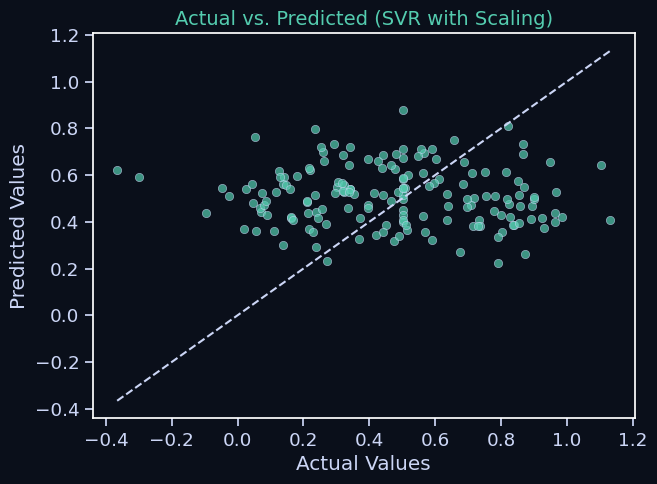

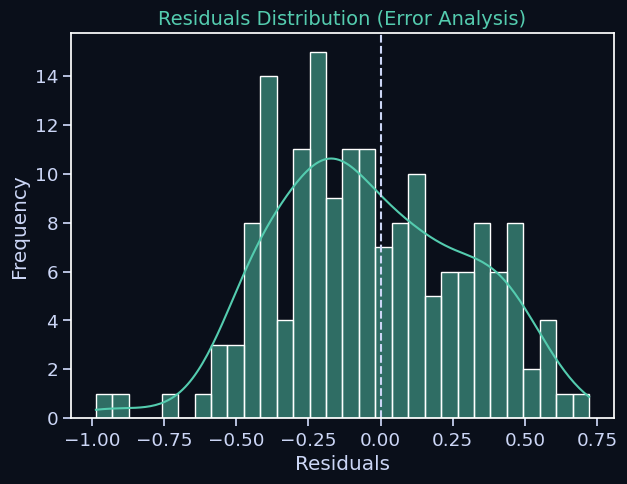

{'Mean Squared Error (MSE)': 0.10780107378414082,
 'Root Mean Squared Error (RMSE)': np.float64(0.32833073840891114),
 'Mean Absolute Error (MAE)': 0.2747015054936679,
 'R² Score': -0.2713573798810085,
 'Mean Absolute Percentage Error (MAPE)': np.float64(152.417196670632)}

In [42]:
# Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# colors
CYBER_BG = "#0a0f1a"
CYBER_TEXT = "#ccd6f6"
CYBER_ACCENT = "#54ccaf"
CYBER_BOX = "#112240"

# Function to set style
def set_cyberpunk_style():
    plt.style.use("dark_background")
    sns.set_palette([CYBER_ACCENT])
    sns.set_context("notebook", font_scale=1.2)
    plt.rcParams.update({
        "axes.facecolor": CYBER_BG,
        "figure.facecolor": CYBER_BG,
        "axes.labelcolor": CYBER_TEXT,
        "xtick.color": CYBER_TEXT,
        "ytick.color": CYBER_TEXT,
        "text.color": CYBER_TEXT,
        "grid.color": "#112240",
    })


# Features and Targets
X = dataset.drop(columns=["Likelihood", "Severity"])
y_likelihood = dataset["Likelihood"]

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train_l, y_test_l = train_test_split(X, y_likelihood, test_size=0.2, random_state=42)

# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize & Train SVR Model with Scaled Features
svr = SVR(kernel='rbf', C=10, gamma='scale')  # Adjusted C for better generalization
svr.fit(X_train_scaled, y_train_l)

# Predict
y_pred_l = svr.predict(X_test_scaled)

# Evaluate Metrics
mse = mean_squared_error(y_test_l, y_pred_l)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_l, y_pred_l)
r2 = r2_score(y_test_l, y_pred_l)
mape = np.mean(np.abs((y_test_l - y_pred_l) / y_test_l)) * 100

# Print Metrics
metrics = {
    "Mean Squared Error (MSE)": mse,
    "Root Mean Squared Error (RMSE)": rmse,
    "Mean Absolute Error (MAE)": mae,
    "R² Score": r2,
    "Mean Absolute Percentage Error (MAPE)": mape
}

# Scatter Plot: Actual vs. Predicted
set_cyberpunk_style()
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test_l, y=y_pred_l, edgecolor=CYBER_TEXT, color=CYBER_ACCENT, alpha=0.7)
plt.plot([min(y_test_l), max(y_test_l)], [min(y_test_l), max(y_test_l)], color=CYBER_TEXT, linestyle='dashed')  # Diagonal Line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted (SVR with Scaling)", fontsize=14, color=CYBER_ACCENT)
plt.show()

# Residuals Plot
residuals = y_test_l - y_pred_l
plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=30, kde=True, color=CYBER_ACCENT)
plt.axvline(x=0, color=CYBER_TEXT, linestyle='dashed')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution (Error Analysis)", fontsize=14, color=CYBER_ACCENT)
plt.show()

# Return metrics
metrics


### Random Forest

Mean Squared Error (MSE): 0.0880
Root Mean Squared Error (RMSE): 0.2966
Mean Absolute Error (MAE): 0.2453
R² Score: -0.0374
Mean Absolute Percentage Error (MAPE): 152.51%
                         Feature  Importance
11              Cybercrime_Index    0.085735
8          Media_Sentiment_Score    0.075516
3           Event_Media_Coverage    0.074378
6        Geopolitical_Risk_Index    0.073803
1            Event_Duration_Days    0.073276
7          Economic_Impact_Score    0.071518
12  Cybersecurity_Exposure_Index    0.063615
9         Pre_Event_Threat_Count    0.053408
5              Num_Cyber_Attacks    0.051504
10       Post_Event_Threat_Count    0.051147


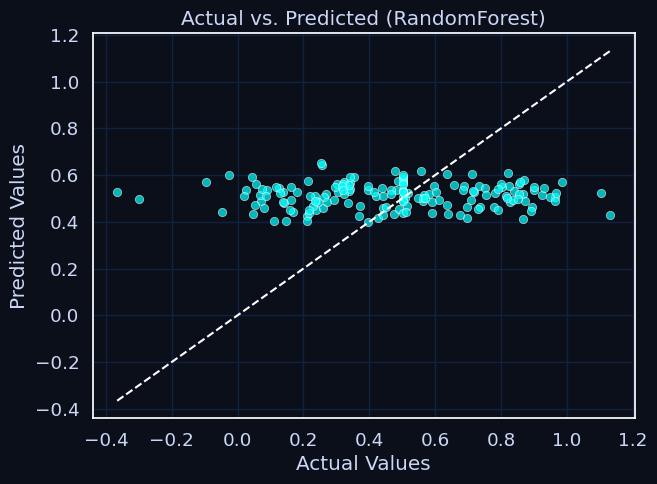

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Features (X) and Target (y)
X = dataset.drop(columns=["Likelihood", "Severity"])
y = dataset["Likelihood"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Model
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict(X_test_scaled)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print Metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Feature Importance Analysis
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances.head(10))  # Show top 10 important features

# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred, color="cyan", alpha=0.7, edgecolor="white")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="white", linestyle='dashed')  # Diagonal Line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted (RandomForest)")
plt.show()


### Standard Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

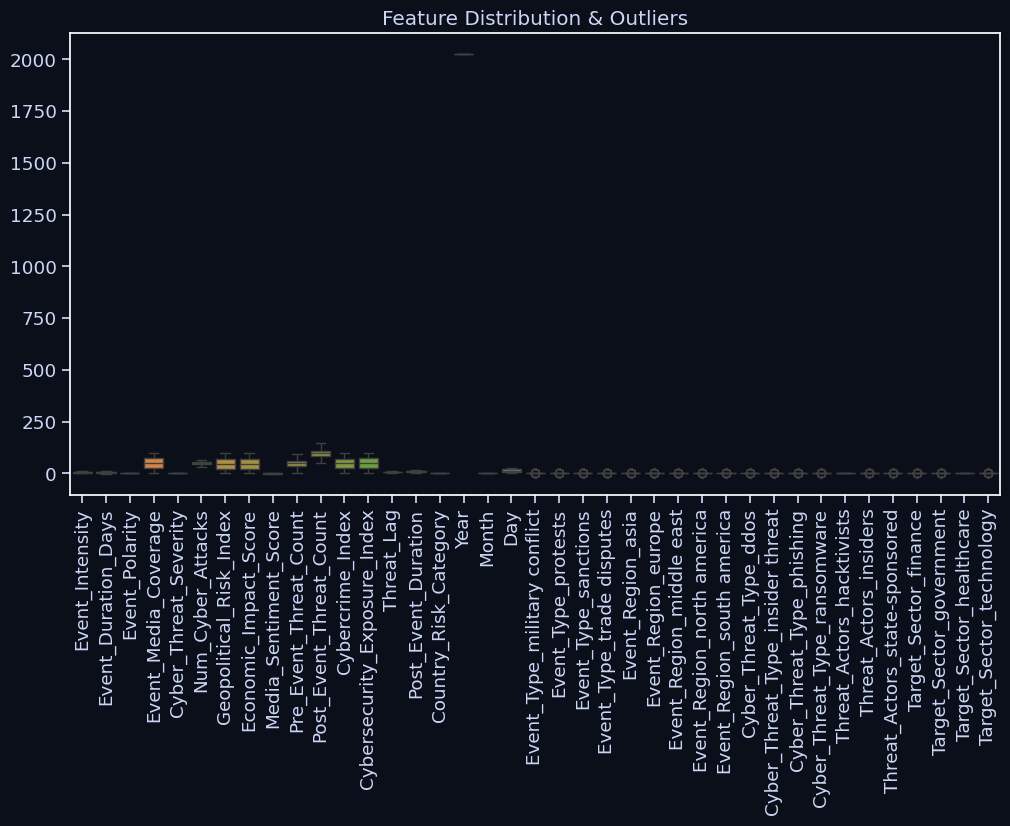

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title("Feature Distribution & Outliers")
plt.show()


## Classification (Random Forest)

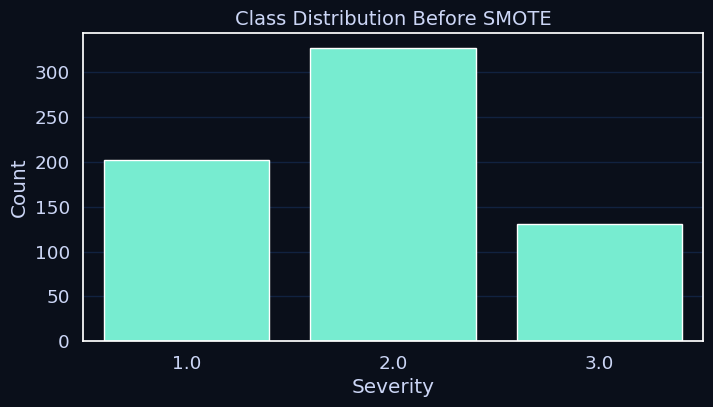

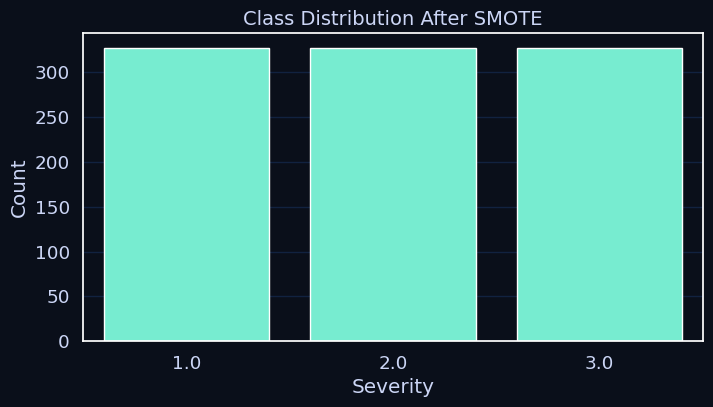

Random Forest Accuracy: 0.9394
Classification Report:
               precision    recall  f1-score   support

         1.0       0.96      0.92      0.94        51
         2.0       0.92      0.96      0.94        81
         3.0       0.97      0.91      0.94        33

    accuracy                           0.94       165
   macro avg       0.95      0.93      0.94       165
weighted avg       0.94      0.94      0.94       165



In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Set color palette
CYBER_BG = "#0a0f1a"
CYBER_TEXT = "#ccd6f6"
CYBER_ACCENT = "#64ffda"
CYBER_BOX = "#112240"

# Features & target
X = dataset.drop(columns=["Severity"])
y = dataset["Severity"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Function to set plot style
def set_cyberpunk_style():
    plt.style.use("dark_background")
    sns.set_palette([CYBER_ACCENT])
    sns.set_context("notebook", font_scale=1.2)
    plt.rcParams.update({
        "axes.facecolor": CYBER_BG,
        "figure.facecolor": CYBER_BG,
        "axes.labelcolor": CYBER_TEXT,
        "xtick.color": CYBER_TEXT,
        "ytick.color": CYBER_TEXT,
        "text.color": CYBER_TEXT,
        "grid.color": "#112240",
    })

# Plot class distribution before SMOTE
set_cyberpunk_style()
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, color=CYBER_ACCENT)
plt.title("Class Distribution Before SMOTE", fontsize=14, color=CYBER_TEXT)
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

# Apply SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Plot class distribution after SMOTE
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_resampled, color=CYBER_ACCENT)
plt.title("Class Distribution After SMOTE", fontsize=14, color=CYBER_TEXT)
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

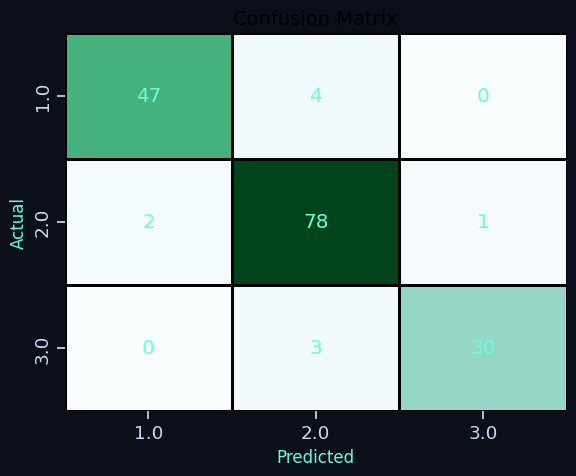

In [47]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))

sns.heatmap(cm, annot=True, fmt="d", cmap="BuGn",
            linewidths=2, linecolor="#000",
            xticklabels=np.unique(y), yticklabels=np.unique(y),
            cbar=False, annot_kws={"color": "#64ffda"})

plt.xlabel("Predicted", fontsize=12, color=CYBER_ACCENT)
plt.ylabel("Actual", fontsize=12, color=CYBER_ACCENT)
plt.title("Confusion Matrix", fontsize=14, color="#000")

plt.tight_layout()

#  Show the plot
plt.show()

IndexError: index 39 is out of bounds for axis 0 with size 39

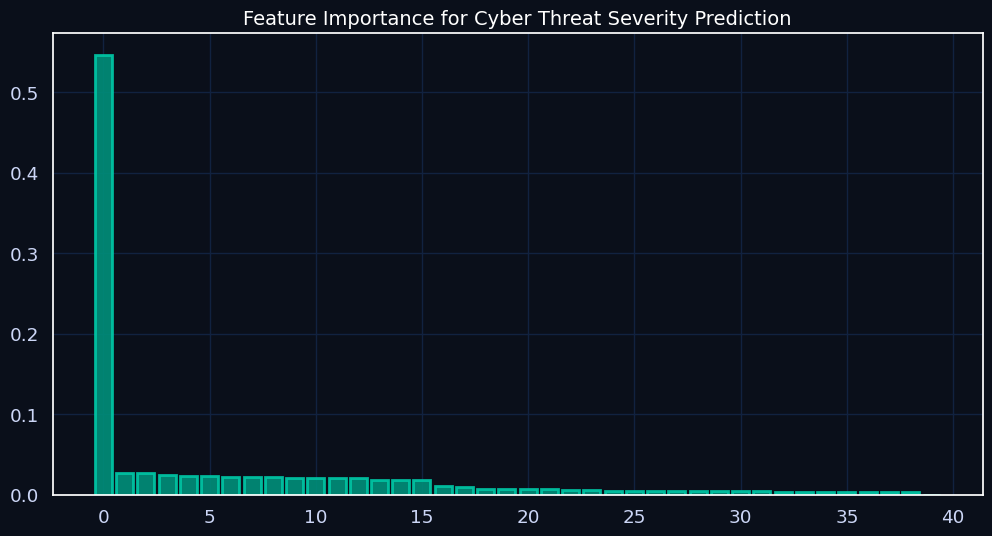

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

CYBER_BG = "#e0fff7"
CYBER_TEXT = "#fff"
CYBER_BAR = "#008f7a"
CYBER_BORDER = "#00c9a7"
CYBER_MUTED = "#4a6b6b"

plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[indices], color=CYBER_BAR,
        edgecolor=CYBER_BORDER, linewidth=2, alpha=0.9)

plt.title("Feature Importance for Cyber Threat Severity Prediction", fontsize=14, color=CYBER_TEXT)
plt.xticks(range(len(importances)), [feature_names[i] for i in indices],
           rotation=45, fontsize=11, color=CYBER_TEXT, ha="right")
plt.xlabel("Features", fontsize=12, color=CYBER_TEXT)
plt.ylabel("Importance Score", fontsize=12, color=CYBER_TEXT)

plt.gca().set_facecolor(CYBER_BG)
plt.plot(color=CYBER_BORDER, linestyle="--", linewidth=1, alpha=0.5)

plt.tight_layout()

plt.show()


# Hyperparameter Tuning

In [49]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200, 500],  # Number of trees
    "max_depth": [10, 20, 30, None],  # Tree depth
    "min_samples_split": [2, 5, 10],  # Min samples required to split
    "min_samples_leaf": [1, 2, 4],  # Min samples at leaf node
    "bootstrap": [True, False]  # Bootstrap sampling
}

# Randomized search for best parameters
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=20,  # Number of random samples
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Train with best hyperparameters
rf_random.fit(X_train_resampled, y_train_resampled)

# Get best model
best_rf = rf_random.best_estimator_

# Predict & Evaluate
y_pred_best = best_rf.predict(X_test)

accuracy_best_rf = accuracy_score(y_test, y_pred_best)
print(f"Optimized Random Forest Accuracy: {accuracy_best_rf:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_best))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Optimized Random Forest Accuracy: 0.9394
Classification Report:
               precision    recall  f1-score   support

         1.0       0.96      0.92      0.94        51
         2.0       0.92      0.96      0.94        81
         3.0       0.97      0.91      0.94        33

    accuracy                           0.94       165
   macro avg       0.95      0.93      0.94       165
weighted avg       0.94      0.94      0.94       165



# Results and Visualisations

<ipython-input-50-eccff2f64689>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset['Severity'], palette=["#64ffda", "#52e0c4", "#8892b0"])


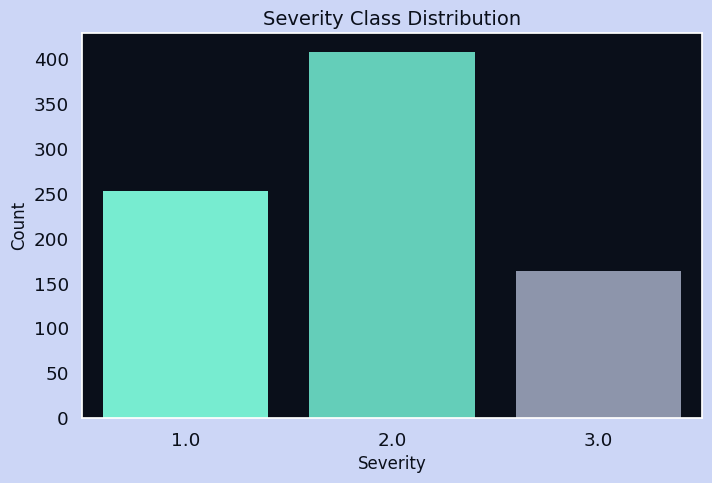

In [50]:
# --- Class Distribution ---
plt.figure(figsize=(8, 5), facecolor="#ccd6f6")

sns.countplot(x=dataset['Severity'], palette=["#64ffda", "#52e0c4", "#8892b0"])

plt.title("Severity Class Distribution", color="#0a0f1a", fontsize=14)
plt.xlabel("Severity", color="#0a0f1a", fontsize=12)
plt.ylabel("Count", color="#0a0f1a", fontsize=12)

plt.xticks(color="#0a0f1a")
plt.yticks(color="#0a0f1a")

plt.show()

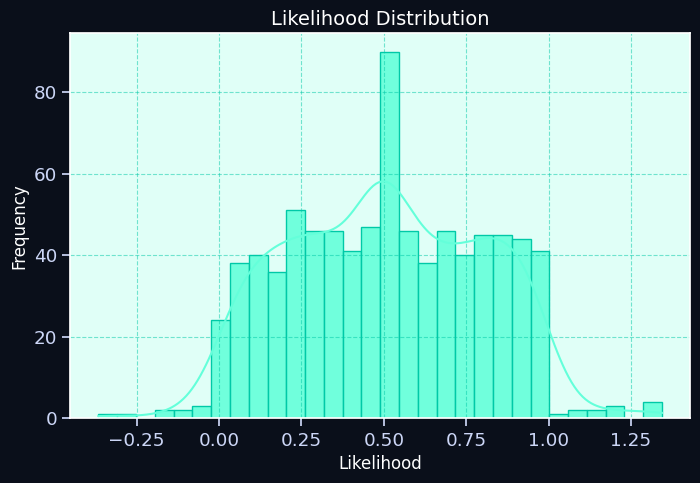

In [51]:
# --- Likelihood Distribution ---
plt.figure(figsize=(8, 5))

sns.histplot(dataset['Likelihood'], bins=30, kde=True,
             color=CYBER_ACCENT, edgecolor=CYBER_BORDER, alpha=0.9)

plt.title("Likelihood Distribution", fontsize=14, color=CYBER_TEXT)
plt.xlabel("Likelihood", fontsize=12, color=CYBER_TEXT)
plt.ylabel("Frequency", fontsize=12, color=CYBER_TEXT)

plt.gca().set_facecolor(CYBER_BG)
plt.grid(color=CYBER_BORDER, linestyle="--", linewidth=0.8, alpha=0.5)

plt.show()


<ipython-input-52-0f455b1f3953>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset['Severity'], y=dataset['Likelihood'],
<ipython-input-52-0f455b1f3953>:5: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=dataset['Severity'], y=dataset['Likelihood'],


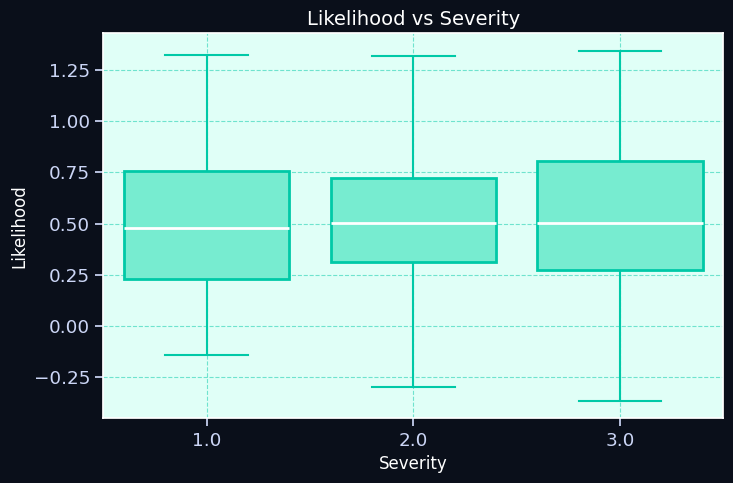

In [52]:
# --- Likelihood vs Severity Relationship ---
plt.figure(figsize=(8, 5))

sns.boxplot(x=dataset['Severity'], y=dataset['Likelihood'],
            palette=[CYBER_ACCENT],
            boxprops=dict(edgecolor=CYBER_BORDER, linewidth=2),
            whiskerprops=dict(color=CYBER_BORDER, linewidth=1.5),
            capprops=dict(color=CYBER_BORDER, linewidth=1.5),
            medianprops=dict(color=CYBER_TEXT, linewidth=2))

plt.title("Likelihood vs Severity", fontsize=14, color=CYBER_TEXT)
plt.xlabel("Severity", fontsize=12, color=CYBER_TEXT)
plt.ylabel("Likelihood", fontsize=12, color=CYBER_TEXT)

plt.gca().set_facecolor(CYBER_BG)
plt.grid(color=CYBER_BORDER, linestyle="--", linewidth=0.8, alpha=0.5)

plt.show()


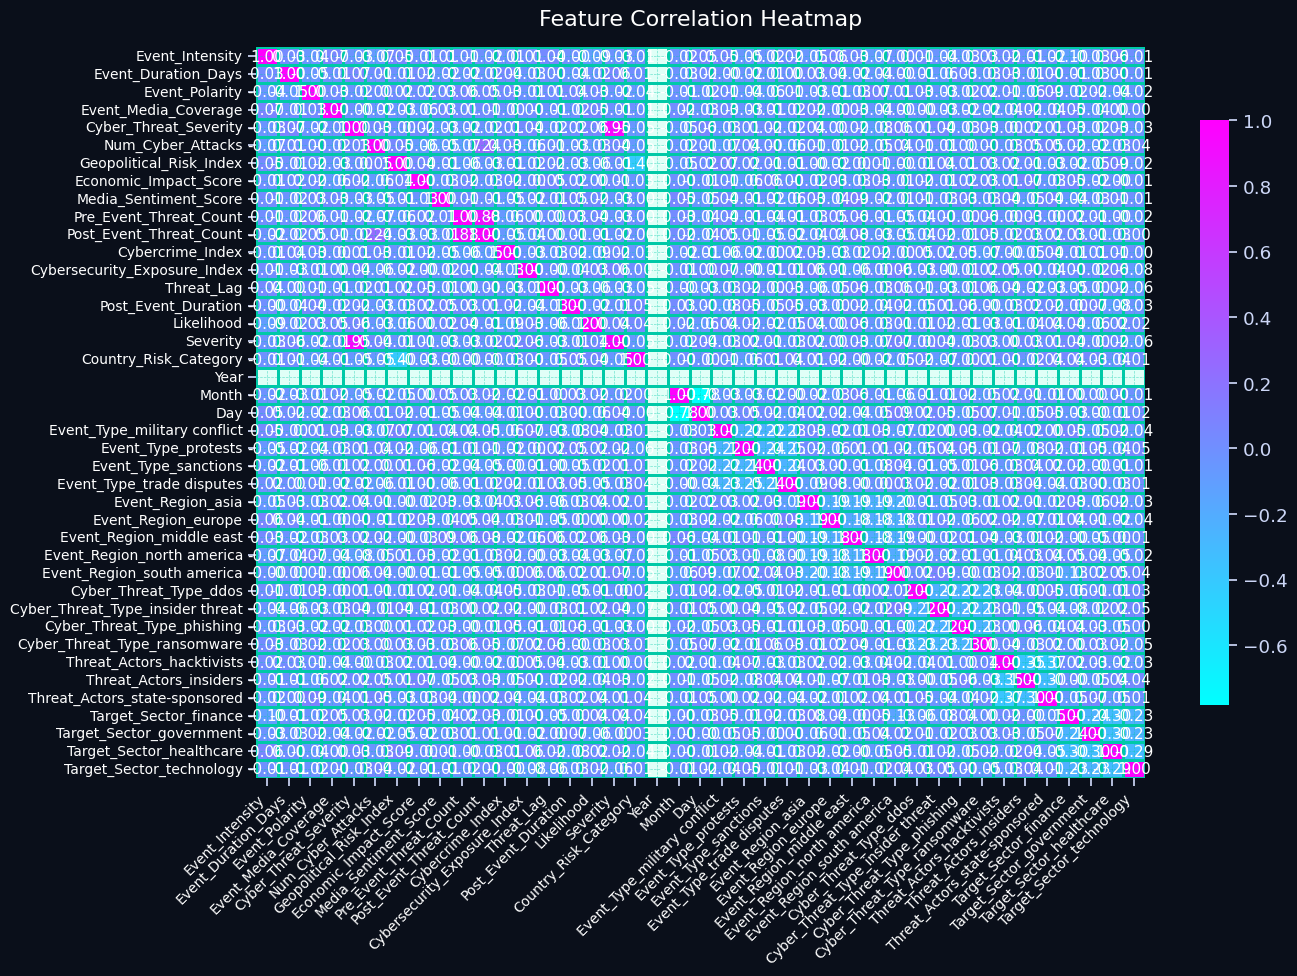

In [53]:
# ---  Correlation Matrix ---
corr = dataset.corr(method='spearman')

plt.figure(figsize=(14, 10))

sns.heatmap(
    corr,
    annot=True,
    cmap="cool",
    fmt=".2f",
    linewidths=1.0,
    linecolor=CYBER_BORDER,
    annot_kws={"size": 11, "color": CYBER_TEXT},
    cbar_kws={"shrink": 0.8}  # Makes colorbar smaller
)

plt.title("Feature Correlation Heatmap", fontsize=16, color=CYBER_TEXT, pad=16)
plt.xticks(fontsize=10, color=CYBER_TEXT, rotation=45, ha="right")
plt.yticks(fontsize=10, color=CYBER_TEXT, rotation=0)

plt.gca().set_facecolor(CYBER_BG)
plt.grid(color=CYBER_BORDER, linestyle="--", linewidth=0.5, alpha=0.5)

plt.tight_layout()

plt.show()


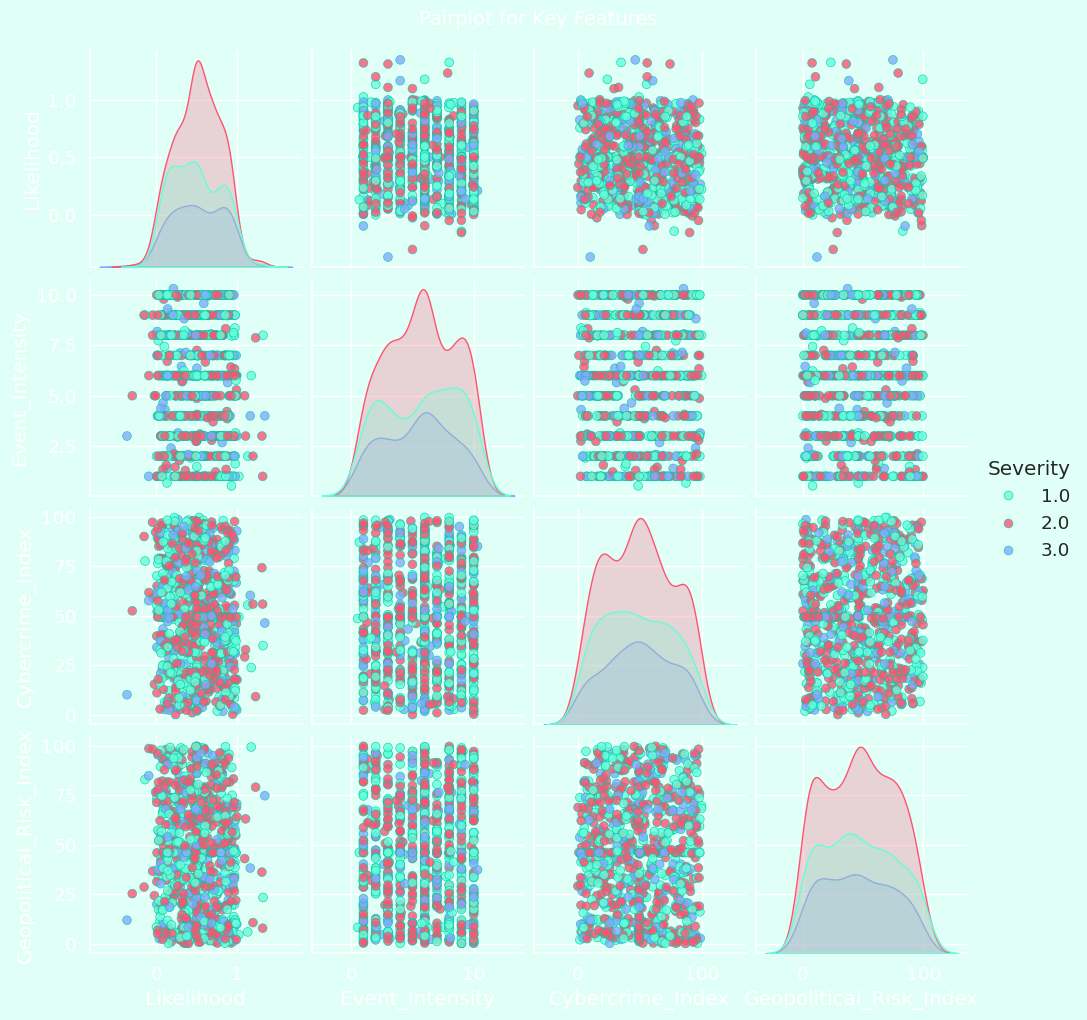

In [66]:
# ---  Pairplot for Key Features ---
key_features = ['Likelihood', 'Severity', 'Event_Intensity', 'Cybercrime_Index', 'Geopolitical_Risk_Index']

sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.2)

pairplot = sns.pairplot(dataset[key_features], hue='Severity',
                        palette=[CYBER_ACCENT, "#ff5370", "#82aaff"],
                        diag_kind="kde", plot_kws={"alpha": 0.8, "s": 40, "edgecolor": CYBER_BORDER})

pairplot.fig.suptitle("Pairplot for Key Features",
                      y=1.02, fontsize=14, color=CYBER_TEXT)

pairplot.fig.set_facecolor(CYBER_BG)

for ax in pairplot.axes.flatten():
    if ax:
        ax.set_facecolor(CYBER_BG)
        ax.xaxis.label.set_color(CYBER_TEXT)
        ax.yaxis.label.set_color(CYBER_TEXT)
        ax.title.set_color(CYBER_ACCENT)
        ax.tick_params(colors=CYBER_TEXT)

plt.show()


In [55]:
from sklearn.preprocessing import label_binarize

# Only include the classes present in y_test
valid_classes = sorted(y_test.unique())  # Ensures we only use available classes

# Binarize y_test with the correct classes
y_test_bin = label_binarize(y_test, classes=valid_classes)

# Ensure your model predictions match the same shape
y_pred_proba_rf = rf_model.predict_proba(X_test)
y_pred_proba_rf = y_pred_proba_rf[:, :len(valid_classes)]

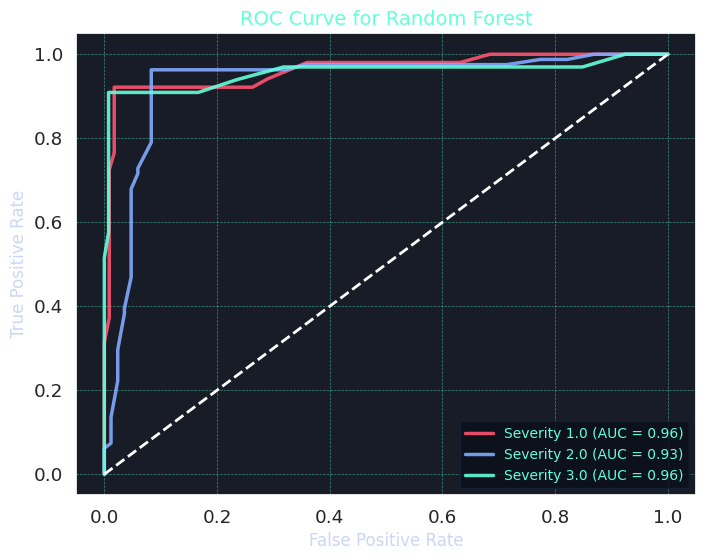

In [56]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ---  ROC Curve ---
plt.figure(figsize=(8, 6))
plt.gca().set_facecolor("#0a0f1a")

# Colors
CYBER_BG = "#0a0f1a"
CYBER_BORDER = "#112240"
CYBER_ACCENT = "#64ffda"
CYBER_TEXT = "#ccd6f6"

roc_colors = ["#ff5370", "#82aaff", CYBER_ACCENT]

for i, severity in enumerate(valid_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_rf[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Severity {severity} (AUC = {roc_auc:.2f})',
             color=roc_colors[i % len(roc_colors)], linewidth=2.5, alpha=0.9)

# 🔹 Reference Line (Random Classifier)
plt.plot([0, 1], [0, 1], color='white', linestyle='--', alpha=1.0, linewidth=2)

plt.xlabel("False Positive Rate", fontsize=12, color=CYBER_TEXT)
plt.ylabel("True Positive Rate", fontsize=12, color=CYBER_TEXT)
plt.title("ROC Curve for Random Forest", fontsize=14, color=CYBER_ACCENT)

legend = plt.legend(facecolor=CYBER_BG, edgecolor=CYBER_BORDER, fontsize=10)

for text in legend.get_texts():
    text.set_color(CYBER_ACCENT)

plt.grid(color=CYBER_ACCENT, linestyle="--", linewidth=0.5, alpha=0.5)
plt.gca().patch.set_alpha(0.95)

plt.show()


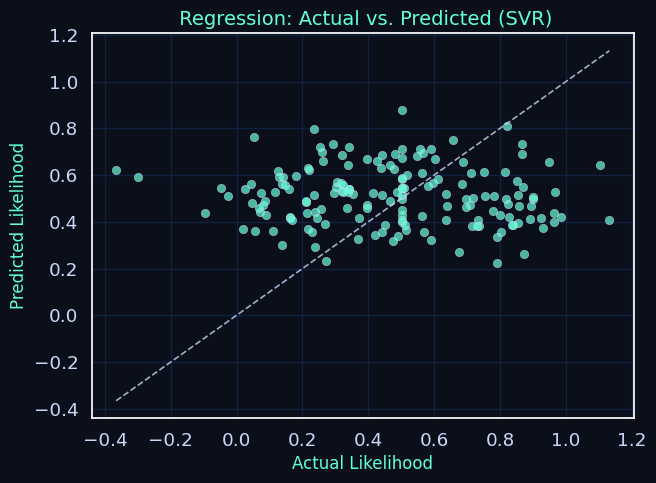

In [57]:
set_cyberpunk_style()

plt.figure(figsize=(7, 5))

sns.scatterplot(x=y_test_l, y=y_pred_l, edgecolor=CYBER_TEXT, color=CYBER_ACCENT, alpha=0.7)

plt.plot([min(y_test_l), max(y_test_l)], [min(y_test_l), max(y_test_l)],
         color=CYBER_TEXT, linestyle='dashed', linewidth=1.2, alpha=0.8)

plt.xlabel("Actual Likelihood", fontsize=12, color=CYBER_ACCENT)
plt.ylabel("Predicted Likelihood", fontsize=12, color=CYBER_ACCENT)
plt.title(" Regression: Actual vs. Predicted (SVR)",
          fontsize=14, color=CYBER_ACCENT)

plt.show()


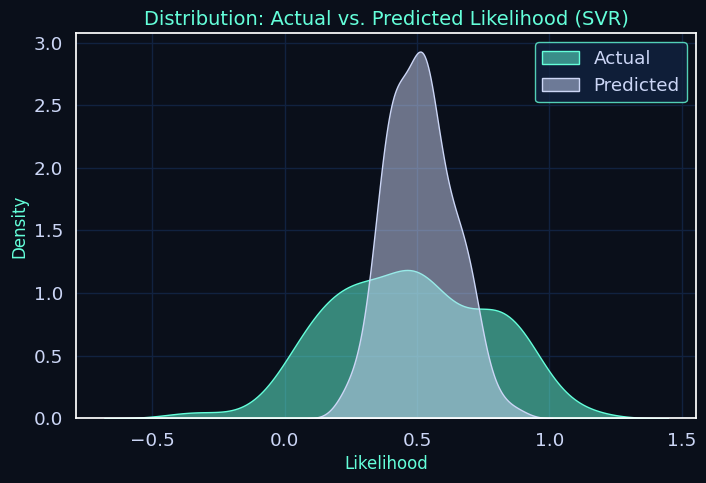

In [58]:
set_cyberpunk_style()

plt.figure(figsize=(8, 5))

sns.kdeplot(y_test_l, label="Actual", fill=True, color=CYBER_ACCENT, alpha=0.5)

sns.kdeplot(y_pred_l, label="Predicted", fill=True, color=CYBER_TEXT, alpha=0.5)

plt.xlabel("Likelihood", fontsize=12, color=CYBER_ACCENT)
plt.ylabel("Density", fontsize=12, color=CYBER_ACCENT)
plt.title("Distribution: Actual vs. Predicted Likelihood (SVR)",
          fontsize=14, color=CYBER_ACCENT)

plt.legend(facecolor=CYBER_BOX, edgecolor=CYBER_ACCENT)

plt.show()


# Save the models

In [ ]:
import joblib
from google.colab import files

# Save both models
joblib.dump(svr, 'svr_likelihood_model.pkl')  # For Likelihood
joblib.dump(best_rf, 'random_forest_severity_model.pkl')# For Severity

# Download both models
files.download("svr_likelihood_model.pkl")
files.download("random_forest_severity_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>